# <center>Lab 5<br>Data Analytics</center>

<a id='zad1'></a>
***Example from the "Bayesian Data Analysis", by Andrew Gelman, John Carlin, Hal Stern, David Dunson, Aki Vehtari, and Donald Rubin.***  

1.Figure 1 shows the counties in the United States with the highest kidney cancer death
rates during the 1980s. More precisely the counties of the United States with the highest 10% age-standardized death rates for
cancer of kidney/ureter for U.S. white males, 1980–1989. What you notice about the map? Why is this?

![Figure1](DA5_2.JPG "Figure 1")

2. Look at Figure 2, which plots the 10% of counties with the lowest kidney cancer death rates of kidney/ureter for U.S. white males, 1980–1989. What you notice about the map? Why is this?

![Figure2](DA5_3.JPG "Figure 2")

3. Download the datasats from upel website.

4. After reading the dataset, we can use same method to check the top n rows of the dataframe; where n is an integer. Take a look at our dataset. What header means?

5. Consider a county with 1000 people (you cane use [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) function). 
6. What if it has no kidney cancer death? We should [merge or join datasets](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)? What if the county will have even one kidney cancer death during the decade?

7. Consider more counties with small population. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("cntypop.txt", sep='\s*\t{1,}\s*', engine='python')
df84 = pd.read_csv("gd80to84.txt", sep='\s*\t{1,}\s*', engine='python')
df89 = pd.read_csv("gd85to89.txt", sep='\s*\t{1,}\s*', engine='python')

# topPop - the total number
# dc - the number of deaths
# 
# totPop - 'total population',
# countyNm - 'county name',
# stateAb - 'state abbreviation',
# lat - 'latitude',
# lon - 'longitute',
# stf - 'state number'
# hHolds - 'possessions' (gospodarstwa)
# 

df.head(5)

stf  ctyf countyNm stateAb  totPop  hHolds     land       lat       lon
0    1   100  Autauga      AL   34222   12732  1543666  32542207 -86641472
1    1   300  Baldwin      AL   98280   50933  4135016  30654881 -87754736
2    1   500  Barbour      AL   25417   10705  2292133  31863073 -85388993
3    1   700     Bibb      AL   16576    6404  1611914  32996943 -87126855
4    1   900   Blount      AL   39248   15790  1672287  33979740 -86566214

In [3]:
# state county
# dc - death count
# dcV - deathcount valid
# pop - population
# popV - population valid
df84.head()

state   county   dc    dcV       pop   popV  aadc       aadcV  dcC  \
0  ALABAMA  AUTAUGA  2.0  VALID   61921.0  VALID   3.3  UNRELIABLE  3.2   
1  ALABAMA  BALDWIN  7.0  VALID  170945.0  VALID   3.5  UNRELIABLE  4.1   
2  ALABAMA  BARBOUR  0.0  VALID   33316.0  VALID   0.0  UNRELIABLE  0.0   
3  ALABAMA     BIBB  0.0  VALID   30152.0  VALID   0.0  UNRELIABLE  0.0   
4  ALABAMA   BLOUNT  3.0  VALID   88342.0  VALID   3.2  UNRELIABLE  3.4   

         dcCV  good  
0  UNRELIABLE     1  
1  UNRELIABLE     1  
2  UNRELIABLE     1  
3  UNRELIABLE     1  
4  UNRELIABLE     1

In [4]:
df84['dcCV'].value_counts()

UNRELIABLE    2885
VALID          229
Name: dcCV, dtype: int64

In [5]:
df84['dcV'].value_counts()

VALID    3115
Name: dcV, dtype: int64

In [6]:
df84['good'].value_counts()

1    3067
0      48
2      15
Name: good, dtype: int64

In [7]:
df89[df89['county'] == "MAUI"]

state county   dc    dcV      pop   popV  aadc       aadcV  dcC  \
521  HAWAII   MAUI  3.0  VALID  94384.0  VALID   3.9  UNRELIABLE  3.2   

           dcCV  good  
521  UNRELIABLE     0

In [8]:
location = df.loc[df["totPop"] == 1000]
location

stf  ctyf    countyNm stateAb  totPop  hHolds     land       lat  \
2396   46  7100  Washabaugh      SD    1000    1147  4841467  43697000   

            lon  
2396 -101636476

In [9]:
city = location.countyNm.values[0].upper()
df84.loc[df84["county"]==city]

Empty DataFrame
Columns: [state, county, dc, dcV, pop, popV, aadc, aadcV, dcC, dcCV, good]
Index: []

In [10]:
print(df84.size)
print(df89.size)
df84['state'].value_counts()

34430
34430


TEXAS                   254
GEORGIA                 160
VIRGINIA                136
KENTUCKY                120
MISSOURI                115
KANSAS                  105
ILLINOIS                102
NORTH.CAROLINA          100
IOWA                     99
TENNESSEE                95
NEBRASKA                 93
INDIANA                  92
OHIO                     88
MINNESOTA                87
MICHIGAN                 83
MISSISSIPPI              82
OKLAHOMA                 77
ARKANSAS                 75
WISCONSIN                72
PENNSYLVANIA             67
ALABAMA                  67
FLORIDA                  67
SOUTH.DAKOTA             66
LOUISIANA                64
COLORADO                 63
NEW.YORK                 62
CALIFORNIA               58
MONTANA                  57
WEST.VIRGINIA            55
NORTH.DAKOTA             53
SOUTH.CAROLINA           46
IDAHO                    44
WASHINGTON               39
OREGON                   36
NEW.MEXICO               32
UTAH                

# MERGING 
How to get the valid data from the datasets?
New dataset contains only 4 columns (Additional data will not be required in the next steps). For each county (which occurs in all three files and which dcV (deathcount valid) is VALID we have 2 values: 

$y_j$ - sum of the dc colums from 2 files - gd80to84 and gd85to89 (number of kidney cancer deaths in county 𝑗 from 1980–1989).

$n_j$ - totPop from cntypop (population of the county) or pop from gd85to89



In [11]:
df84_valid = df84[df84['dcV'] == 'VALID'][['state', 'county', 'dc', 'pop']]
df89_valid = df89[df89['dcV'] == 'VALID'][['state', 'county', 'dc', 'pop']]

df84_valid['state'] = df84_valid['state'].str.capitalize()
df84_valid['county'] = df84_valid['county'].str.capitalize()
df89_valid['state'] = df89_valid['state'].str.capitalize()
df89_valid['county'] = df89_valid['county'].str.capitalize()

# first step - merge df84 with df89
print(df84_valid.size)
print(df89_valid.size)

#There is a typo in df89 (state name Idado instead Idaho)
df89_valid = df89_valid.replace({'state': {'Idado': 'Idaho'}})
check_data_state = (df84_valid['state'] == df89_valid['state']) 
# check_data_state[check_data_state == False]
print(check_data_state.all())
check_data_county = df84_valid['county'] == df89_valid['county']
print(check_data_state.all())

12460
12460
True
True


In [12]:
# merging 
df84_valid['dc'].add(df89_valid['dc'])
df_valid = df89_valid.copy()
df_valid['dc'] = df84_valid['dc'].add(df89_valid['dc'])
df_valid.head(5)

state   county    dc       pop
0  Alabama  Autauga   3.0   64915.0
1  Alabama  Baldwin  22.0  195253.0
2  Alabama  Barbour   1.0   33987.0
3  Alabama     Bibb   1.0   31175.0
4  Alabama   Blount   8.0   91547.0

***Bayesian inference for the cancer death rates*** 

It is natural to estimate the underlying cancer death rate in each county $j$ using the model
$$y_j \sim Poisson(10n_j\theta_j)$$
where $y_j$ is the number of kidney cancer deaths in county $j$ from 1980–1989, $n_j$ is the
population of the county, and $θ_j$ is the underlying rate in units of deaths per person per
year. 

To perform Bayesian inference, we need a prior distribution for the unknown rate $θ_j$ .
For convenience we use a gamma distribution, which is conjugate to the Poisson. 

1. Calculate a gamma distribution parameters $\alpha$ and $\beta$ to get a reasonable **prior distribution** for underlying kidney cancer death rates in the counties of the U.S. during this period. 

*Hint: The two parameters $\alpha$ and $\beta$ can be estimated from data to match the distribution of the observed cancer death rates $\frac{y_j}{10n_j}$. Under the model, the observed count $y_j$ for any county $j$ comes from the* **predictive distribution**, *which in this case is Neg-bin($\alpha$, $\frac{\beta}{10n_j}$). We can find the mean and variance of this distribution: $E(y_j) = 10n_j\frac{\alpha}{\beta}$ and $var(y_j)= 10n_j\frac{\alpha}{\beta} + (10n_j)^2\frac{\alpha}{\beta^2}$.*

2. Calulate a mean $\frac{\alpha}{\beta}$ and standard deviation $\frac{\sqrt{\alpha}}{\beta}$ of **prior distribution**.

3. The **posterior distribution** of $\theta_j$ is then:
$$\theta_j|y_j \sim Gamma(\alpha+ y_j, \beta +10n_j)$$ which has mean $E(\theta_j|y_j) = \frac{\alpha+ y_j}{\beta +10n_j}$ and variance $var(\theta_j|y_j) = \frac{\alpha+ y_j}{(\beta +10n_j)^2}$

(3115,)


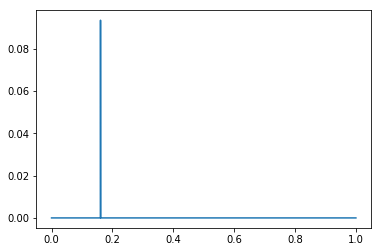

In [38]:
%matplotlib inline
from scipy.stats import gamma
import matplotlib.pyplot as plt
alpha = 4
beta = 4
theta = np.linspace(0, 1, df_valid.dc.shape[0])
plt.figure()
plt.plot(theta, gamma.pdf(theta, a=alpha, scale=1/beta))
print((1/(beta + 10*df_valid['pop'])).shape)
posterior = gamma.pdf(theta,a=alpha+df_valid.dc, scale=1/(beta + 10*df_valid['pop']))
plt.figure()
plt.plot(theta, posterior)
plt.

POLICZYC TE ALFY i BETY

***Inference for a small county*** 

1. Draw 500 values of $\theta_j$ form the [$Gamma(\alpha,\beta)$ distribution](https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.stats.gamma.html). 
2. For each of these, draw one value $y_j$ from the [Poisson distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) with parameter 10,000 $\theta_j$.
3. What you get?


***Inference for a large county*** 

Now consider a large county with $n_j =$ 1 million. How many cancer deaths $y_j$ might we expect to see in a ten-year period? Again we can use the [$Gamma(\alpha,\beta)$ distribution](https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.stats.gamma.html) and $Poisson(10^7\theta_j)$ distributions to simulate 500 values $y_j$ from the predictive distribution. What you get?

***Comparing counties od fiffrent size***  

In the Poisson model $y_j \sim Poisson(10n_j\theta_j)$, the variance of $\frac{y_j}{10n_j}$is inversely proportional to the exposure parameter $n_j$ , which can thus be considered a ‘sample size’ for county $j$. 


1. Draw the raw kidney cancer death rates vary by population. What can you see about the extremely high and extremely low rates?
2. Replotted on the scale of $log_10$ population to see the data more clearly. 
3. Draw the Bayes-estimated rates are much less variable vs. logarithm of population size $n_j$.
4. Displays $50\%$ interval estimates for a sample of 100 counties (posterior medians and 50% intervals for $\theta_j$). What can you see?

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)